<a href="https://colab.research.google.com/github/kimyt1976/AI-Programming/blob/main/%ED%95%B4%EC%96%91%EB%8C%8012%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          18464     
                                                           

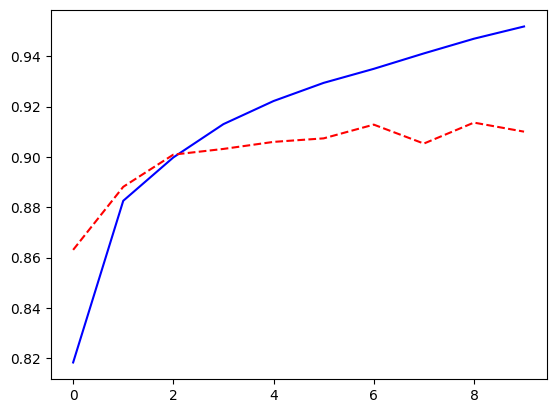

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]
train_images, test_images = train_images / 255, test_images / 255

model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape = (28, 28, 1),
                        kernel_size = (3, 3), padding = 'same',
                        filters = 32),
    keras.layers.MaxPooling2D((3, 3), strides=2),
    keras.layers.Conv2D(kernel_size = (3, 3), padding = 'same',
                        filters = 64),
    keras.layers.MaxPooling2D((3, 3), strides=2),
    keras.layers.Conv2D(kernel_size = (3, 3), padding = 'same',
                        filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels,
                 epochs=10, validation_split=0.25)

plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['val_accuracy'], 'r--')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('테스트 정확도 : ', test_acc)

mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

images = test_images[:50]
pred = np.argmax(model.predict(images), axis=1)
print('예측값 = ', pred)
print('실제값 = ', test_labels[:50])

#전처리한 합성곱 신경망 50개의 데이터에 대한 예측 / epochs=10
#MaxPooling2D((3, 3), strides=2)